In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

/home/dlopez/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dlopez/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dlopez/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dlopez/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
(X_train, _), (X_test, _) =  keras.datasets.fashion_mnist.load_data()
X_train = np.expand_dims(X_train, axis=3)
X_train = (X_train)/255
X_test = np.expand_dims(X_test, axis=3)
X_test = (X_test)/255

In [3]:
X_train_in = np.asarray([x[:18,:,:] for x in X_train])
X_train_out = np.asarray([x[18:,:,:] for x in X_train])

X_test_in = np.asarray([x[:18,:,:] for x in X_test])
X_test_out = np.asarray([x[18:,:,:] for x in X_test])

In [8]:
model = keras.models.Sequential()

model.add(keras.layers.Reshape((18, 28), input_shape=(18, 28)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(200, return_sequences=True)))
model.add(keras.layers.GRU(28*10, activation="sigmoid"))
model.add(keras.layers.Reshape((10, 28, 1)))

model.compile(keras.optimizers.Adam(0.0001), keras.losses.binary_crossentropy)

callbacks = [keras.callbacks.EarlyStopping()]

In [80]:
model.fit(X_train_in, X_train_out,
          validation_data=(X_test_in, X_test_out), epochs=200, batch_size=128, callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.3907 - val_loss: 0.3674


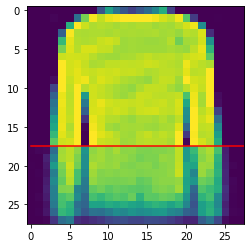

In [71]:
import matplotlib.pyplot as plt
idx = np.random.randint(X_train.shape[0])
plt.imshow(np.concatenate([X_train_in[idx], model.predict(X_train_in[idx:idx+1])[0]], axis=0)[:,:,0])
plt.plot([0,27.5],[17.5, 17.5], color="red")

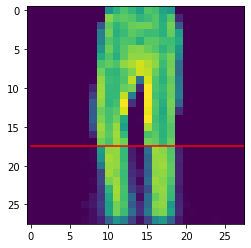

In [76]:
import matplotlib.pyplot as plt
idx = np.random.randint(X_test.shape[0])
plt.imshow(np.concatenate([X_test_in[idx], model.predict(X_test_in[idx:idx+1])[0]], axis=0)[:,:,0])
plt.plot([0,27.5],[17.5, 17.5], color="red")